## Breast Cancer Prediction

In [70]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report, confusion_matrix

In [39]:
# load the dataset
data = pd.read_csv("data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Basic Exploration of the data

In [40]:
# information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [41]:
shapes = data.shape
print("The dataset has {} rows and {} columns ".format(shapes[0],shapes[1]))

The dataset has 569 rows and 33 columns 


In [42]:
#### See the statistical relationships between the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


## Data Preprocessing
Data cleaning

In [43]:
### let's remove the column id and Unnamed:32 
data = data.drop(['id','Unnamed: 32'],axis=1)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [44]:
#### check the null value
null_vals = data.isna().sum()
null_vals

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<Axes: >

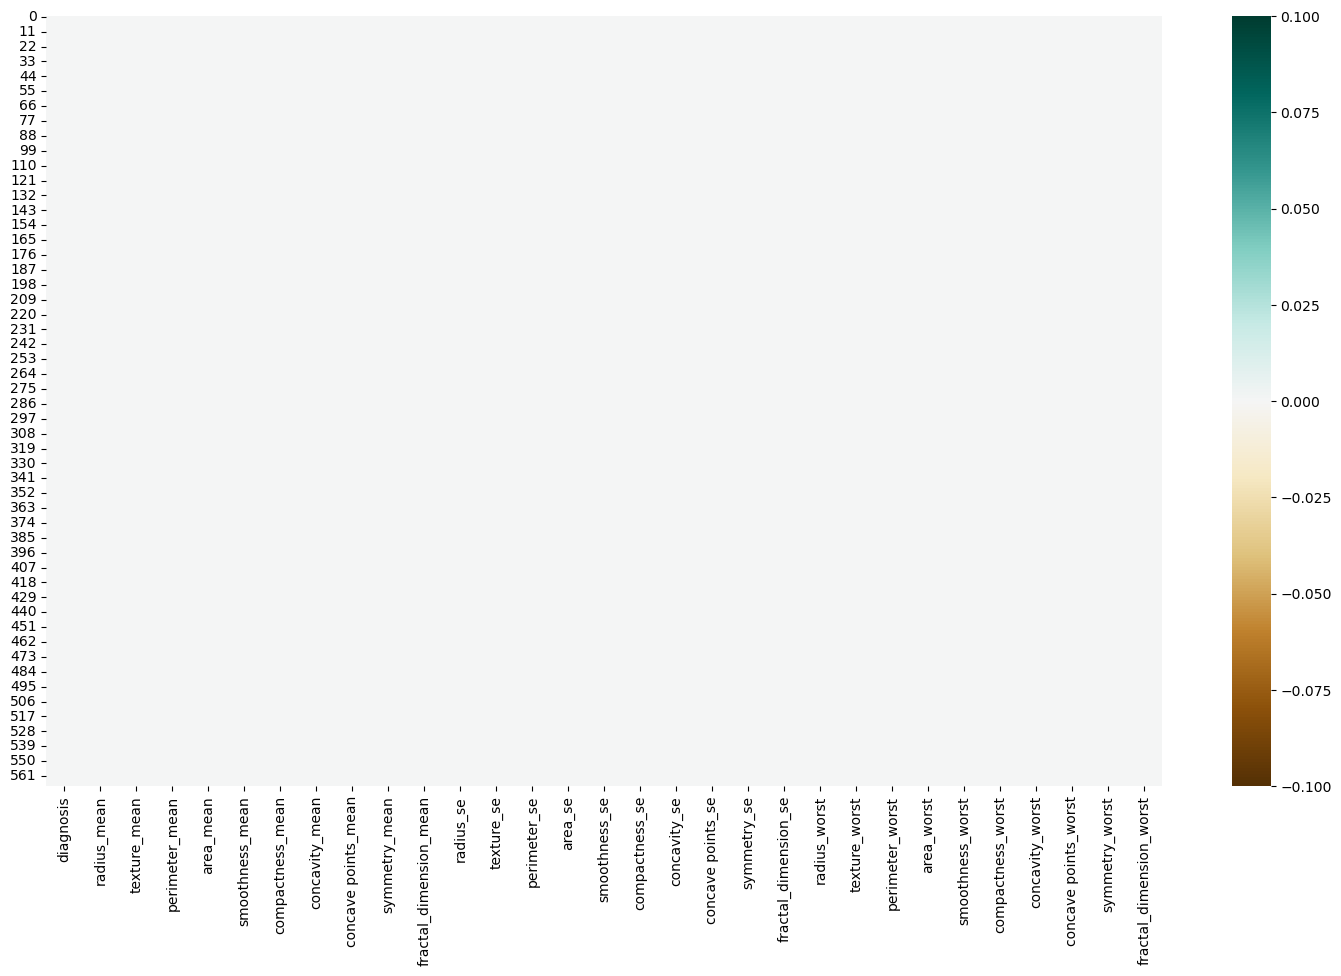

In [45]:
plt.figure(figsize = (18,10))
sns.heatmap(data.isna(), cmap = 'BrBG')

In [46]:
#### Label encoding
label_encoder = preprocessing.LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Correlation report

### Correlation between the dependent and independent features

<Axes: >

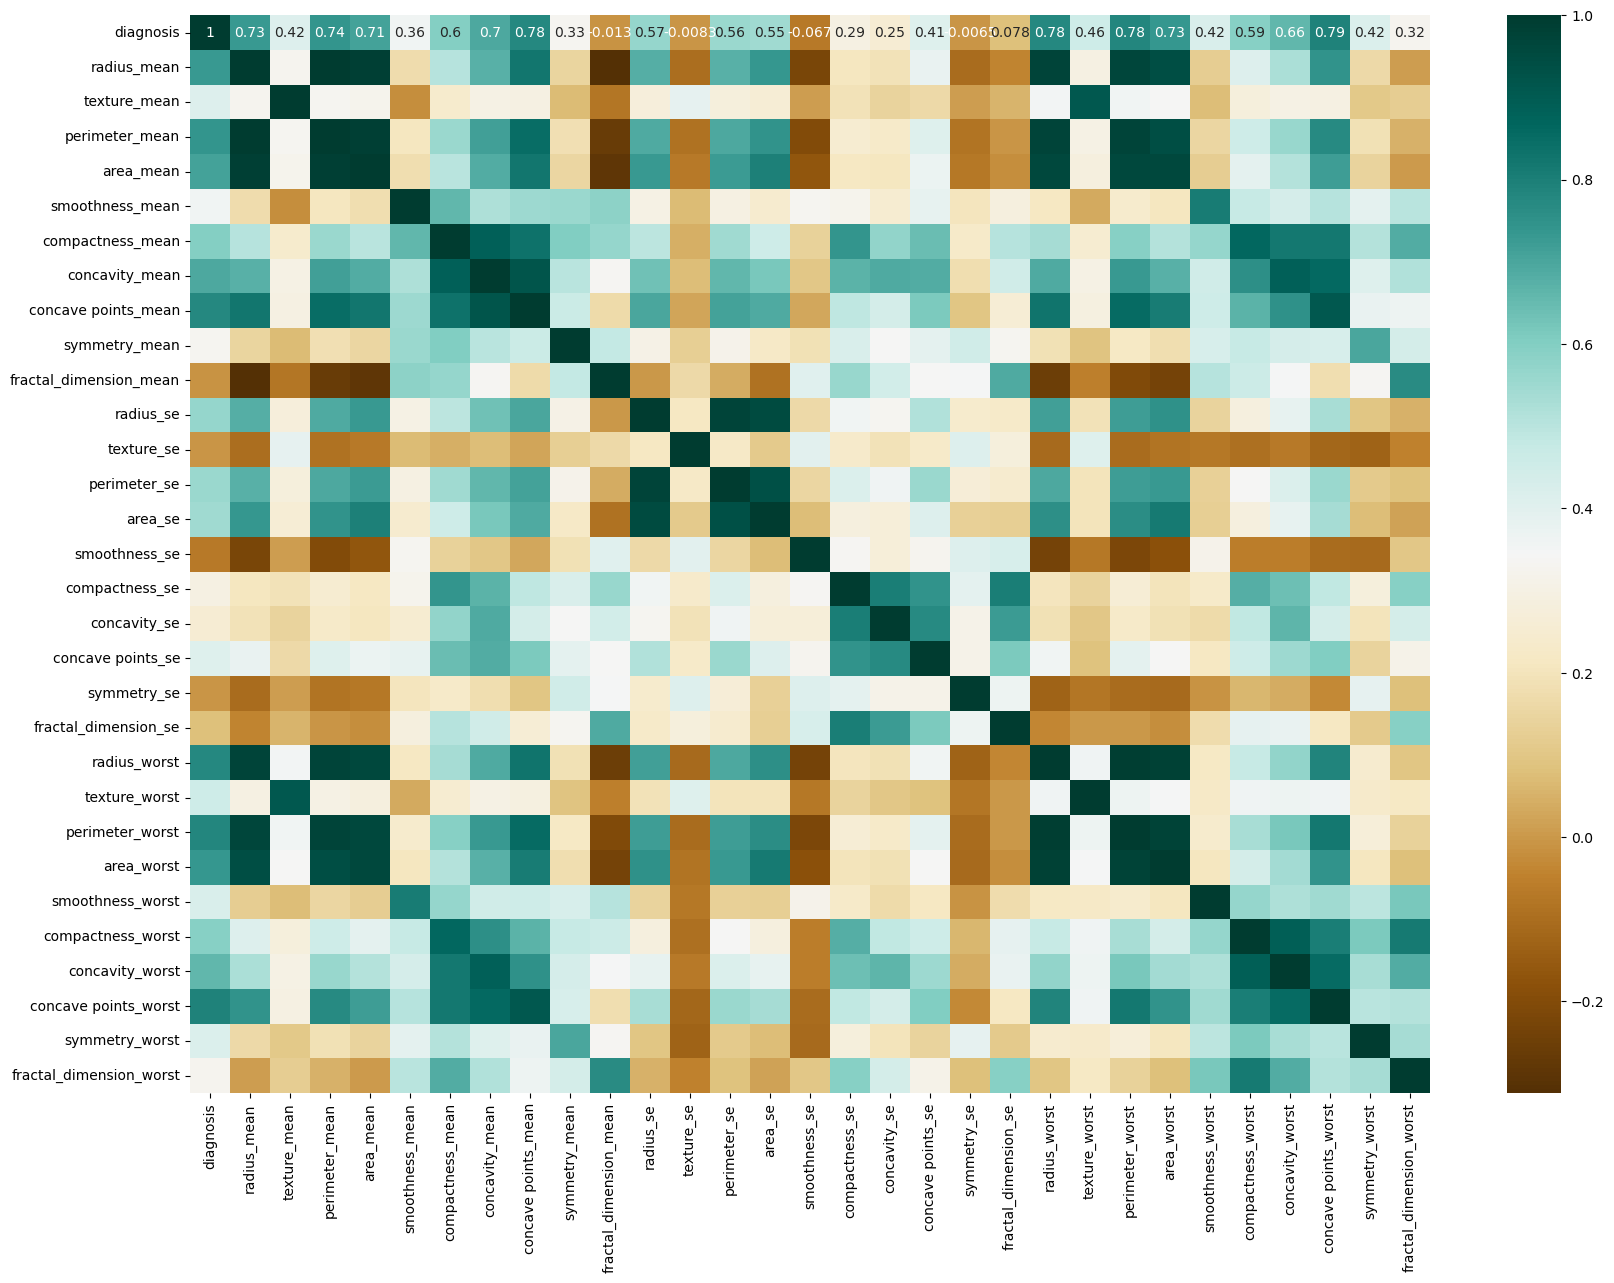

In [47]:
# let's plot the correlation matrix
correlation = data.corr()
plt.figure(figsize = (20,14))
sns.heatmap(correlation, cmap='BrBG', annot = True)

In [48]:
corr_diag = data.corr()['diagnosis']
print(corr_diag)

diagnosis                  1.000000
radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
fractal_dimension_mean    -0.012838
radius_se                  0.567134
texture_se                -0.008303
perimeter_se               0.556141
area_se                    0.548236
smoothness_se             -0.067016
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
symmetry_se               -0.006522
fractal_dimension_se       0.077972
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst          0.590998
concavity_worst            0

In [49]:
## correlation greater than 5
corrgt5 = correlation[abs(correlation['diagnosis']) > 0.5]
corrgt5 = corrgt5.index
print(corrgt5)
print()
print("Highly correlated features ",len(corrgt5))

Index(['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'radius_se', 'perimeter_se', 'area_se', 'radius_worst',
       'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst'],
      dtype='object')

Highly correlated features  16


In [50]:

## correlation greater than 5
corrlt5 = correlation[abs(correlation['diagnosis']) <= 0.5]
corrlt5 = corrlt5.index
print(corrlt5)
print()
print("Least correlated features ",len(corrlt5))

Index(['texture_mean', 'smoothness_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'smoothness_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Least correlated features  15


In [51]:
#selecting 20 most essential features
data = data[['diagnosis', 'radius_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'perimeter_worst', 'area_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst','texture_mean', 
         'smoothness_mean', 'symmetry_mean','area_se','fractal_dimension_se',
         'texture_worst', 'smoothness_worst', 'symmetry_worst',
       'fractal_dimension_worst']]
data.head()

,diagnosis,radius_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst,texture_mean,smoothness_mean,symmetry_mean,area_se,fractal_dimension_se,texture_worst,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,1001.0,0.27760,0.3001,0.14710,184.60,2019.0,0.6656,0.7119,0.2654,10.38,0.11840,0.2419,153.40,0.006193,17.33,0.1622,0.4601,0.11890
1,1,20.57,1326.0,0.07864,0.0869,0.07017,158.80,1956.0,0.1866,0.2416,0.1860,17.77,0.08474,0.1812,74.08,0.003532,23.41,0.1238,0.2750,0.08902
2,1,19.69,1203.0,0.15990,0.1974,0.12790,152.50,1709.0,0.4245,0.4504,0.2430,21.25,0.10960,0.2069,94.03,0.004571,25.53,0.1444,0.3613,0.08758
3,1,11.42,386.1,0.28390,0.2414,0.10520,98.87,567.7,0.8663,0.6869,0.2575,20.38,0.14250,0.2597,27.23,0.009208,26.50,0.2098,0.6638,0.17300
4,1,20.29,1297.0,0.13280,0.1980,0.10430,152.20,1575.0,0.2050,0.4000,0.1625,14.34,0.10030,0.1809,94.44,0.005115,16.67,0.1374,0.2364,0.07678


# Visualization

In [52]:
#Total number of Malignant and Benign in diagnosis column
data['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

C:\Users\prajw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1800x1000 with 0 Axes>

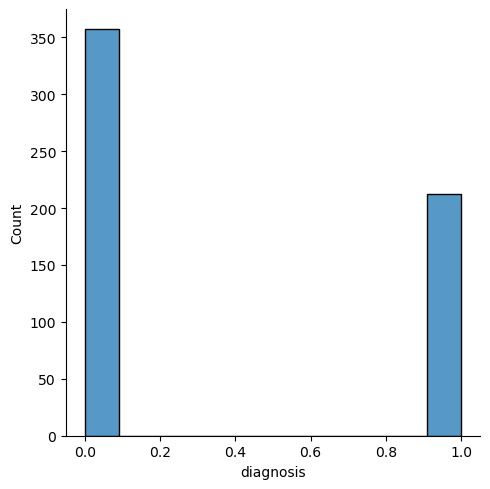

In [53]:
plt.figure(figsize = (18,10))
sns.displot(data['diagnosis'])

In [54]:
data.head()

,diagnosis,radius_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst,texture_mean,smoothness_mean,symmetry_mean,area_se,fractal_dimension_se,texture_worst,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,1001.0,0.27760,0.3001,0.14710,184.60,2019.0,0.6656,0.7119,0.2654,10.38,0.11840,0.2419,153.40,0.006193,17.33,0.1622,0.4601,0.11890
1,1,20.57,1326.0,0.07864,0.0869,0.07017,158.80,1956.0,0.1866,0.2416,0.1860,17.77,0.08474,0.1812,74.08,0.003532,23.41,0.1238,0.2750,0.08902
2,1,19.69,1203.0,0.15990,0.1974,0.12790,152.50,1709.0,0.4245,0.4504,0.2430,21.25,0.10960,0.2069,94.03,0.004571,25.53,0.1444,0.3613,0.08758
3,1,11.42,386.1,0.28390,0.2414,0.10520,98.87,567.7,0.8663,0.6869,0.2575,20.38,0.14250,0.2597,27.23,0.009208,26.50,0.2098,0.6638,0.17300
4,1,20.29,1297.0,0.13280,0.1980,0.10430,152.20,1575.0,0.2050,0.4000,0.1625,14.34,0.10030,0.1809,94.44,0.005115,16.67,0.1374,0.2364,0.07678


C:\Users\prajw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\prajw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\prajw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\prajw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

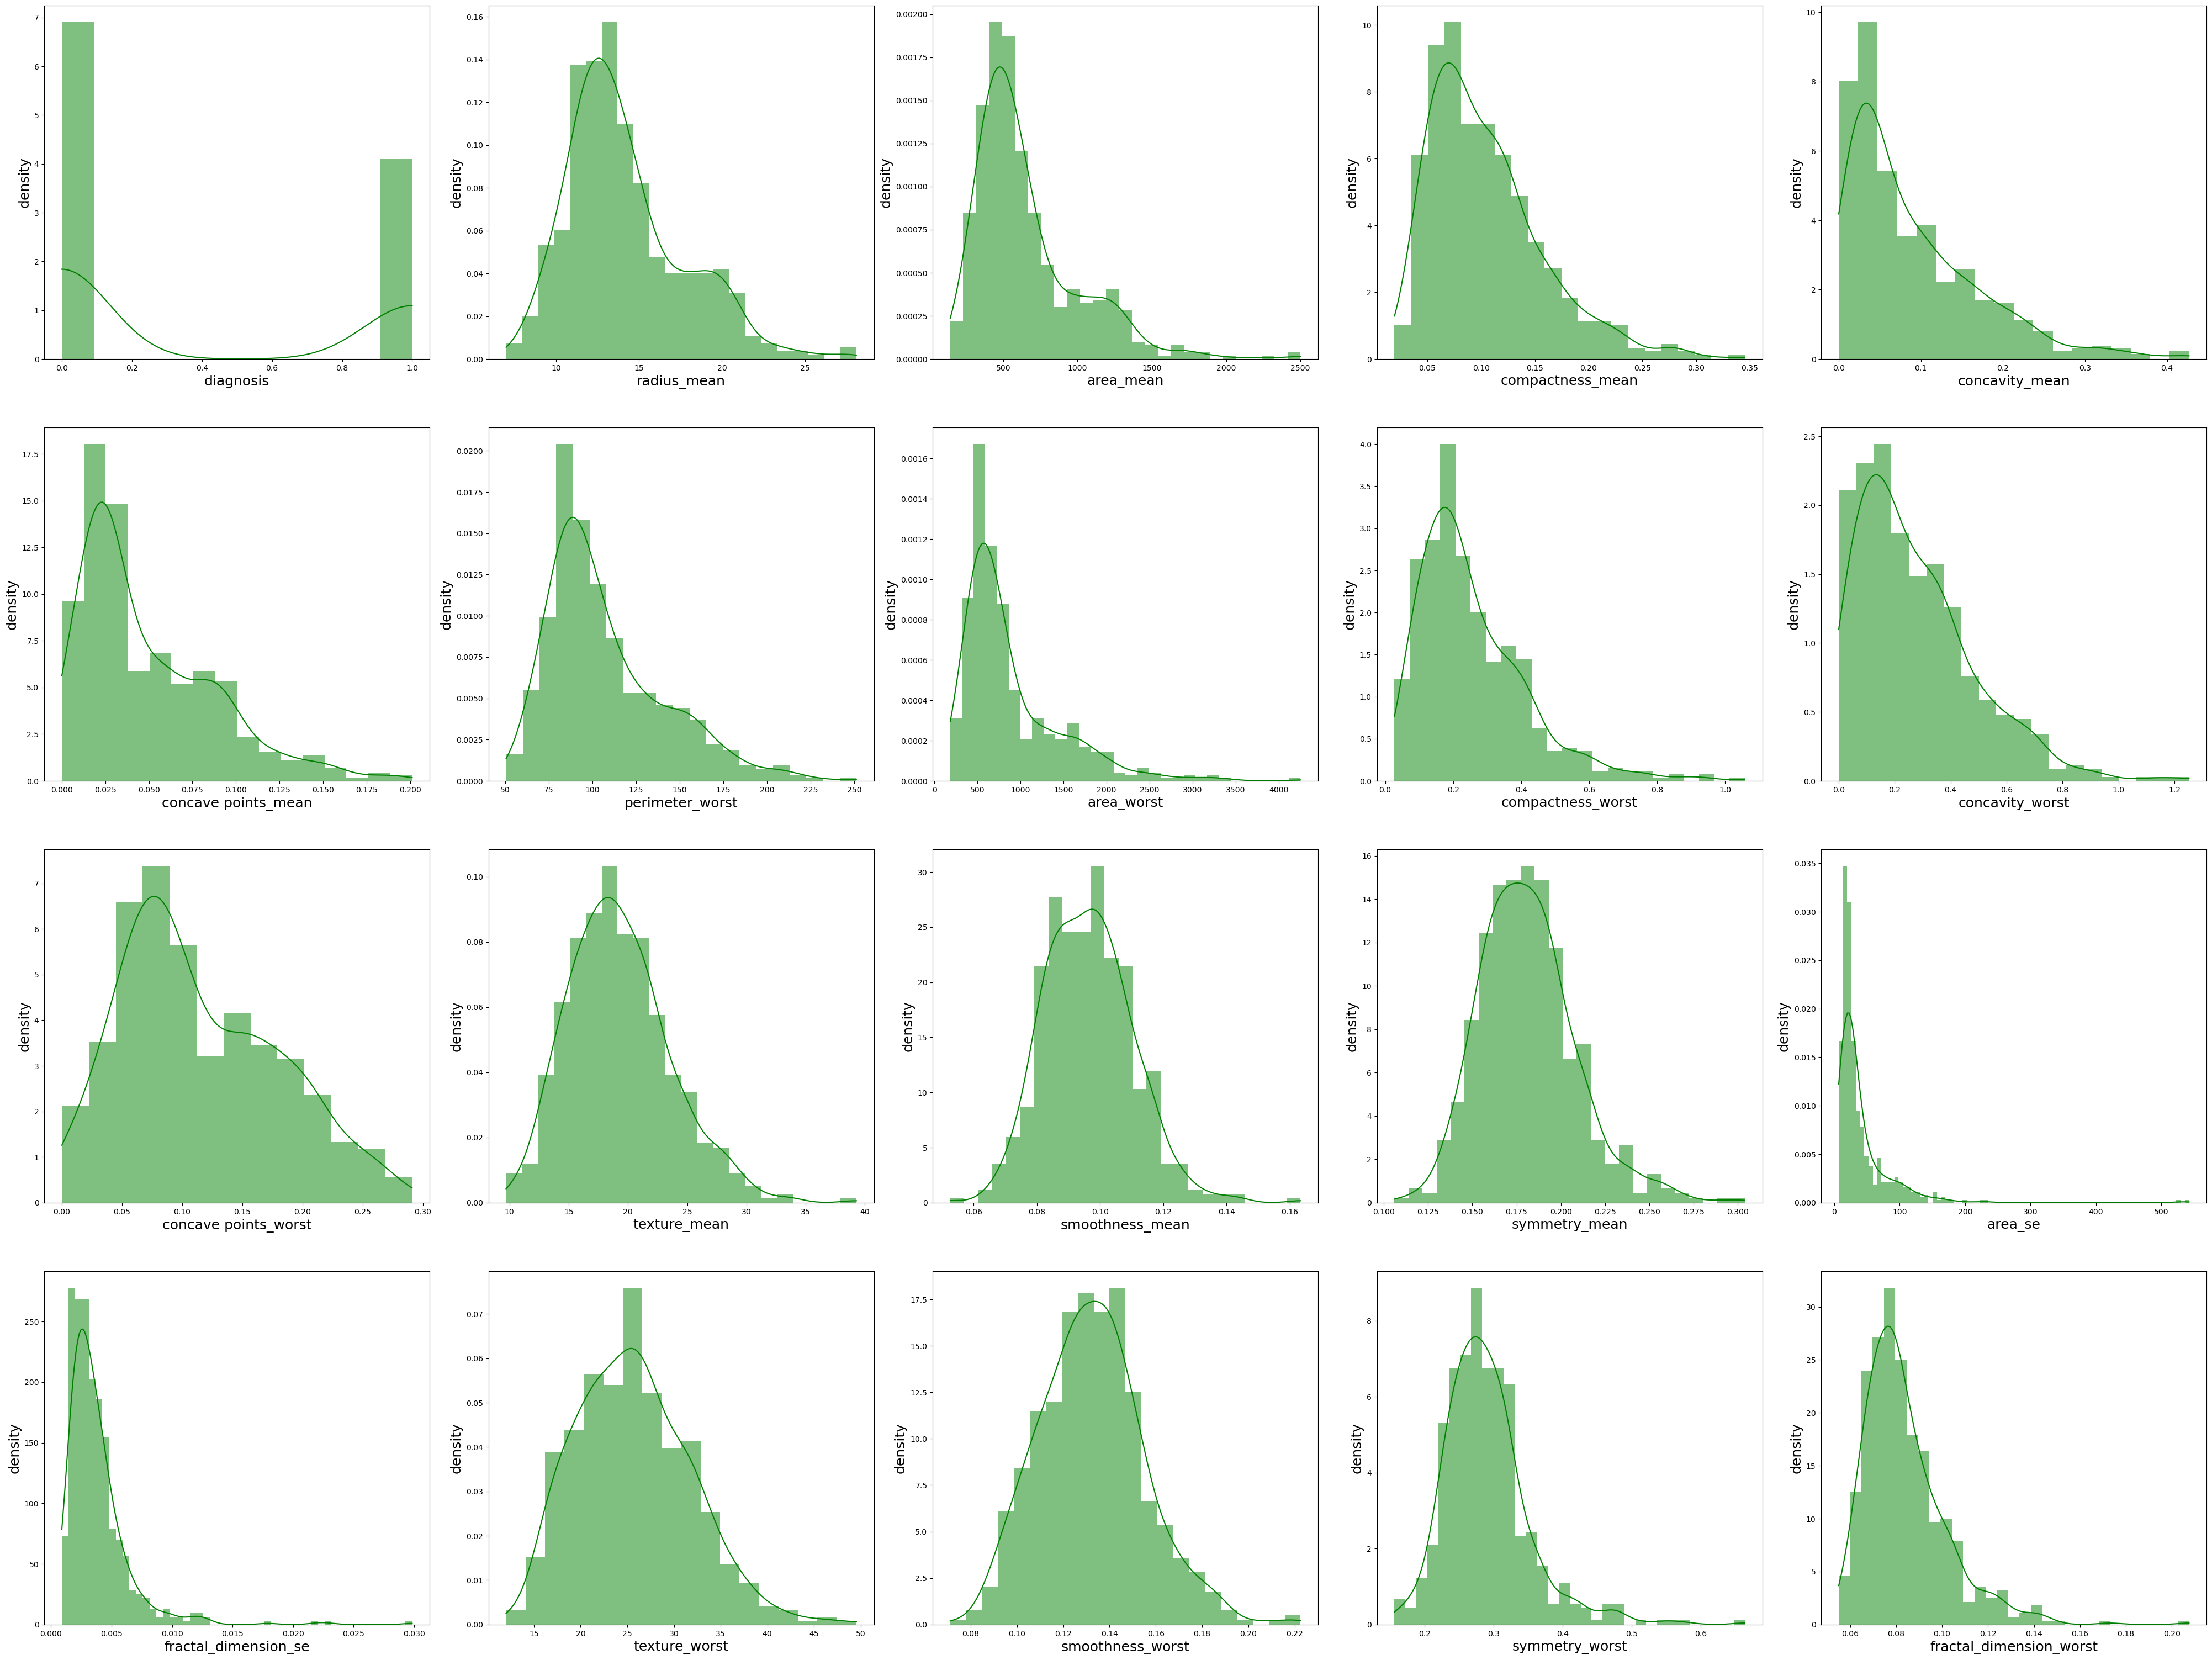

In [55]:
# create hist and kde plots to observe the data distribution
fig, ax = plt.subplots(ncols=5, nrows=4, figsize=(40,30))
index = 0
ax = ax.flatten()

for col, value in data.items():
    col_dist = sns.histplot(value, ax=ax[index], color='green',kde=True, stat="density", linewidth=0)
    col_dist.set_xlabel(col,fontsize=18)
    col_dist.set_ylabel('density',fontsize=18)
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [56]:
# selecting only the skewed columns to transform it in gaussian distribution
data_temp = data[['radius_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'area_worst', 'compactness_worst',
       'concavity_worst', 'area_se','fractal_dimension_se',
         'symmetry_worst', 'fractal_dimension_worst']].copy()
print(data_temp.shape)
data_temp.head()

(569, 12)


,radius_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,area_worst,compactness_worst,concavity_worst,area_se,fractal_dimension_se,symmetry_worst,fractal_dimension_worst
0,17.99,1001.0,0.27760,0.3001,0.14710,2019.0,0.6656,0.7119,153.40,0.006193,0.4601,0.11890
1,20.57,1326.0,0.07864,0.0869,0.07017,1956.0,0.1866,0.2416,74.08,0.003532,0.2750,0.08902
2,19.69,1203.0,0.15990,0.1974,0.12790,1709.0,0.4245,0.4504,94.03,0.004571,0.3613,0.08758
3,11.42,386.1,0.28390,0.2414,0.10520,567.7,0.8663,0.6869,27.23,0.009208,0.6638,0.17300
4,20.29,1297.0,0.13280,0.1980,0.10430,1575.0,0.2050,0.4000,94.44,0.005115,0.2364,0.07678


C:\Users\prajw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\prajw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\prajw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\prajw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

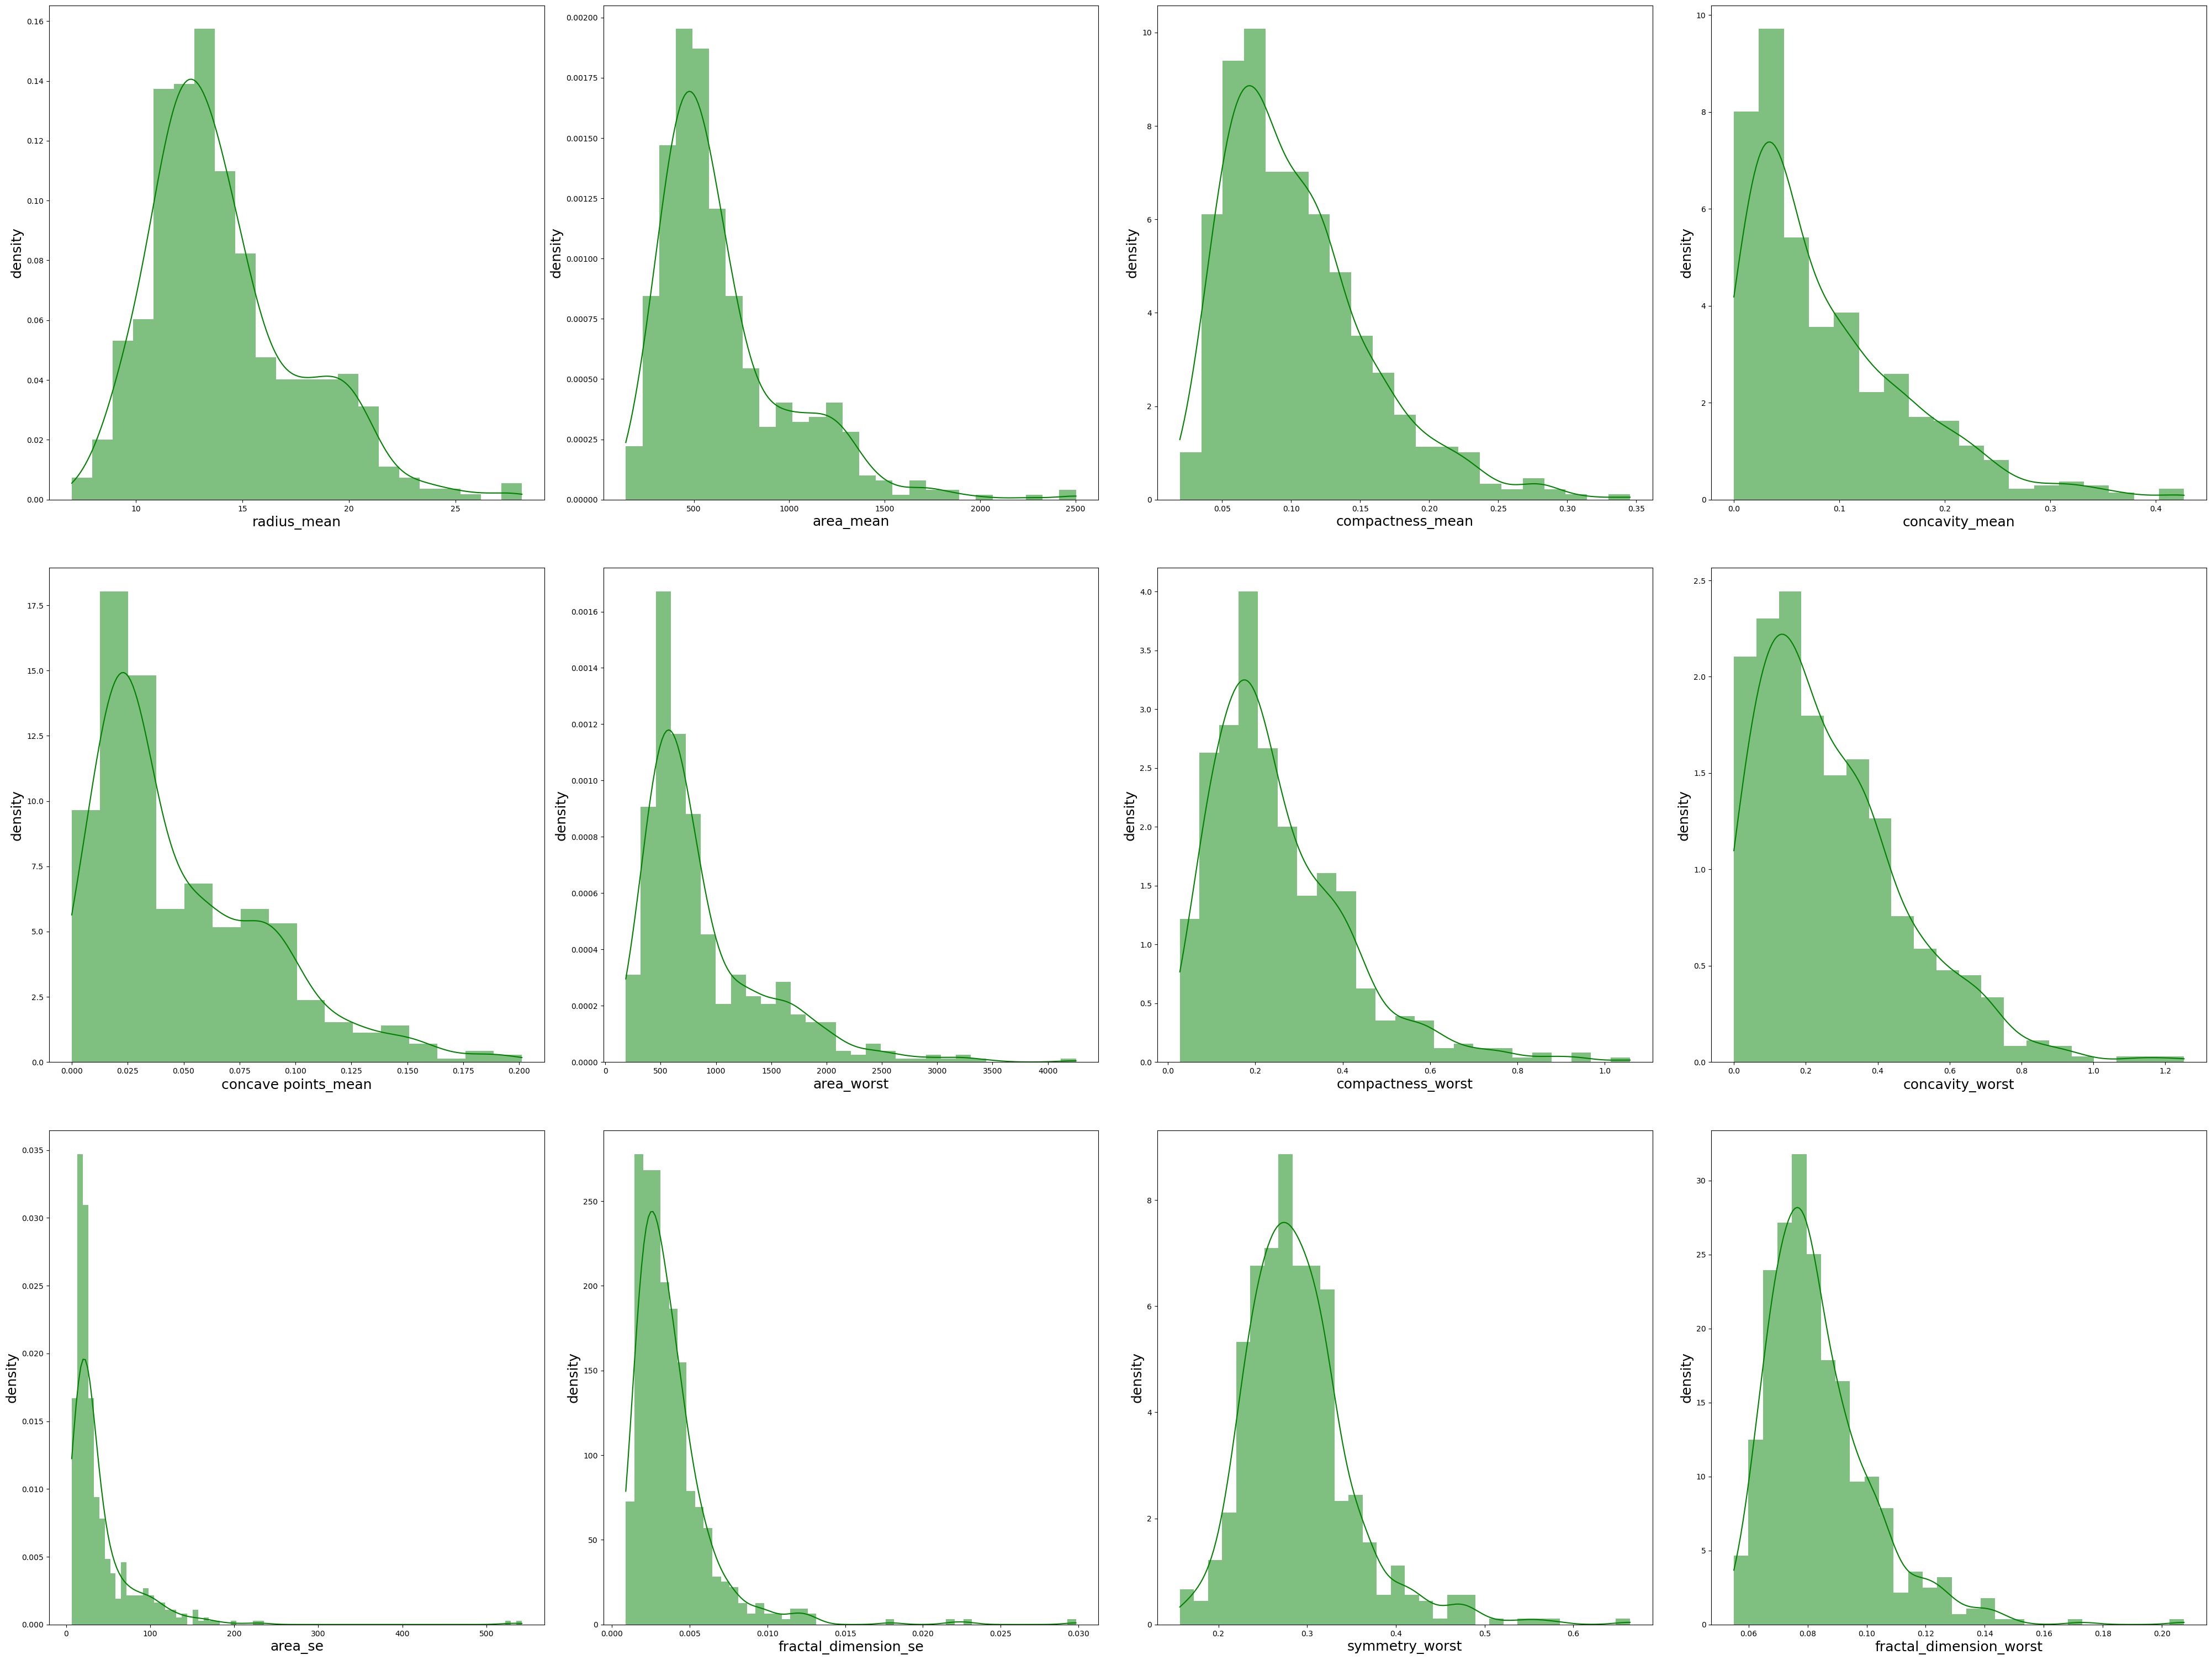

In [57]:
# create hist and kde plots to observe the data distribution
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(40,30))
index = 0
ax = ax.flatten()

for col, value in data_temp.items():
    col_dist = sns.histplot(value, ax=ax[index], color='green',kde=True, stat="density", linewidth=0)
    col_dist.set_xlabel(col,fontsize=18)
    col_dist.set_ylabel('density',fontsize=18)
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [58]:

for feature in data_temp:
    upper_limit = data_temp[feature].mean() + 3*data_temp[feature].std()
    lower_limit = data_temp[feature].mean() - 3*data_temp[feature].std()
    data_temp[feature] = np.where(data_temp[feature]>upper_limit, upper_limit,
                    np.where( data_temp[feature]<lower_limit, lower_limit,
                    data_temp[feature]))

C:\Users\prajw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\prajw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\prajw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\prajw\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

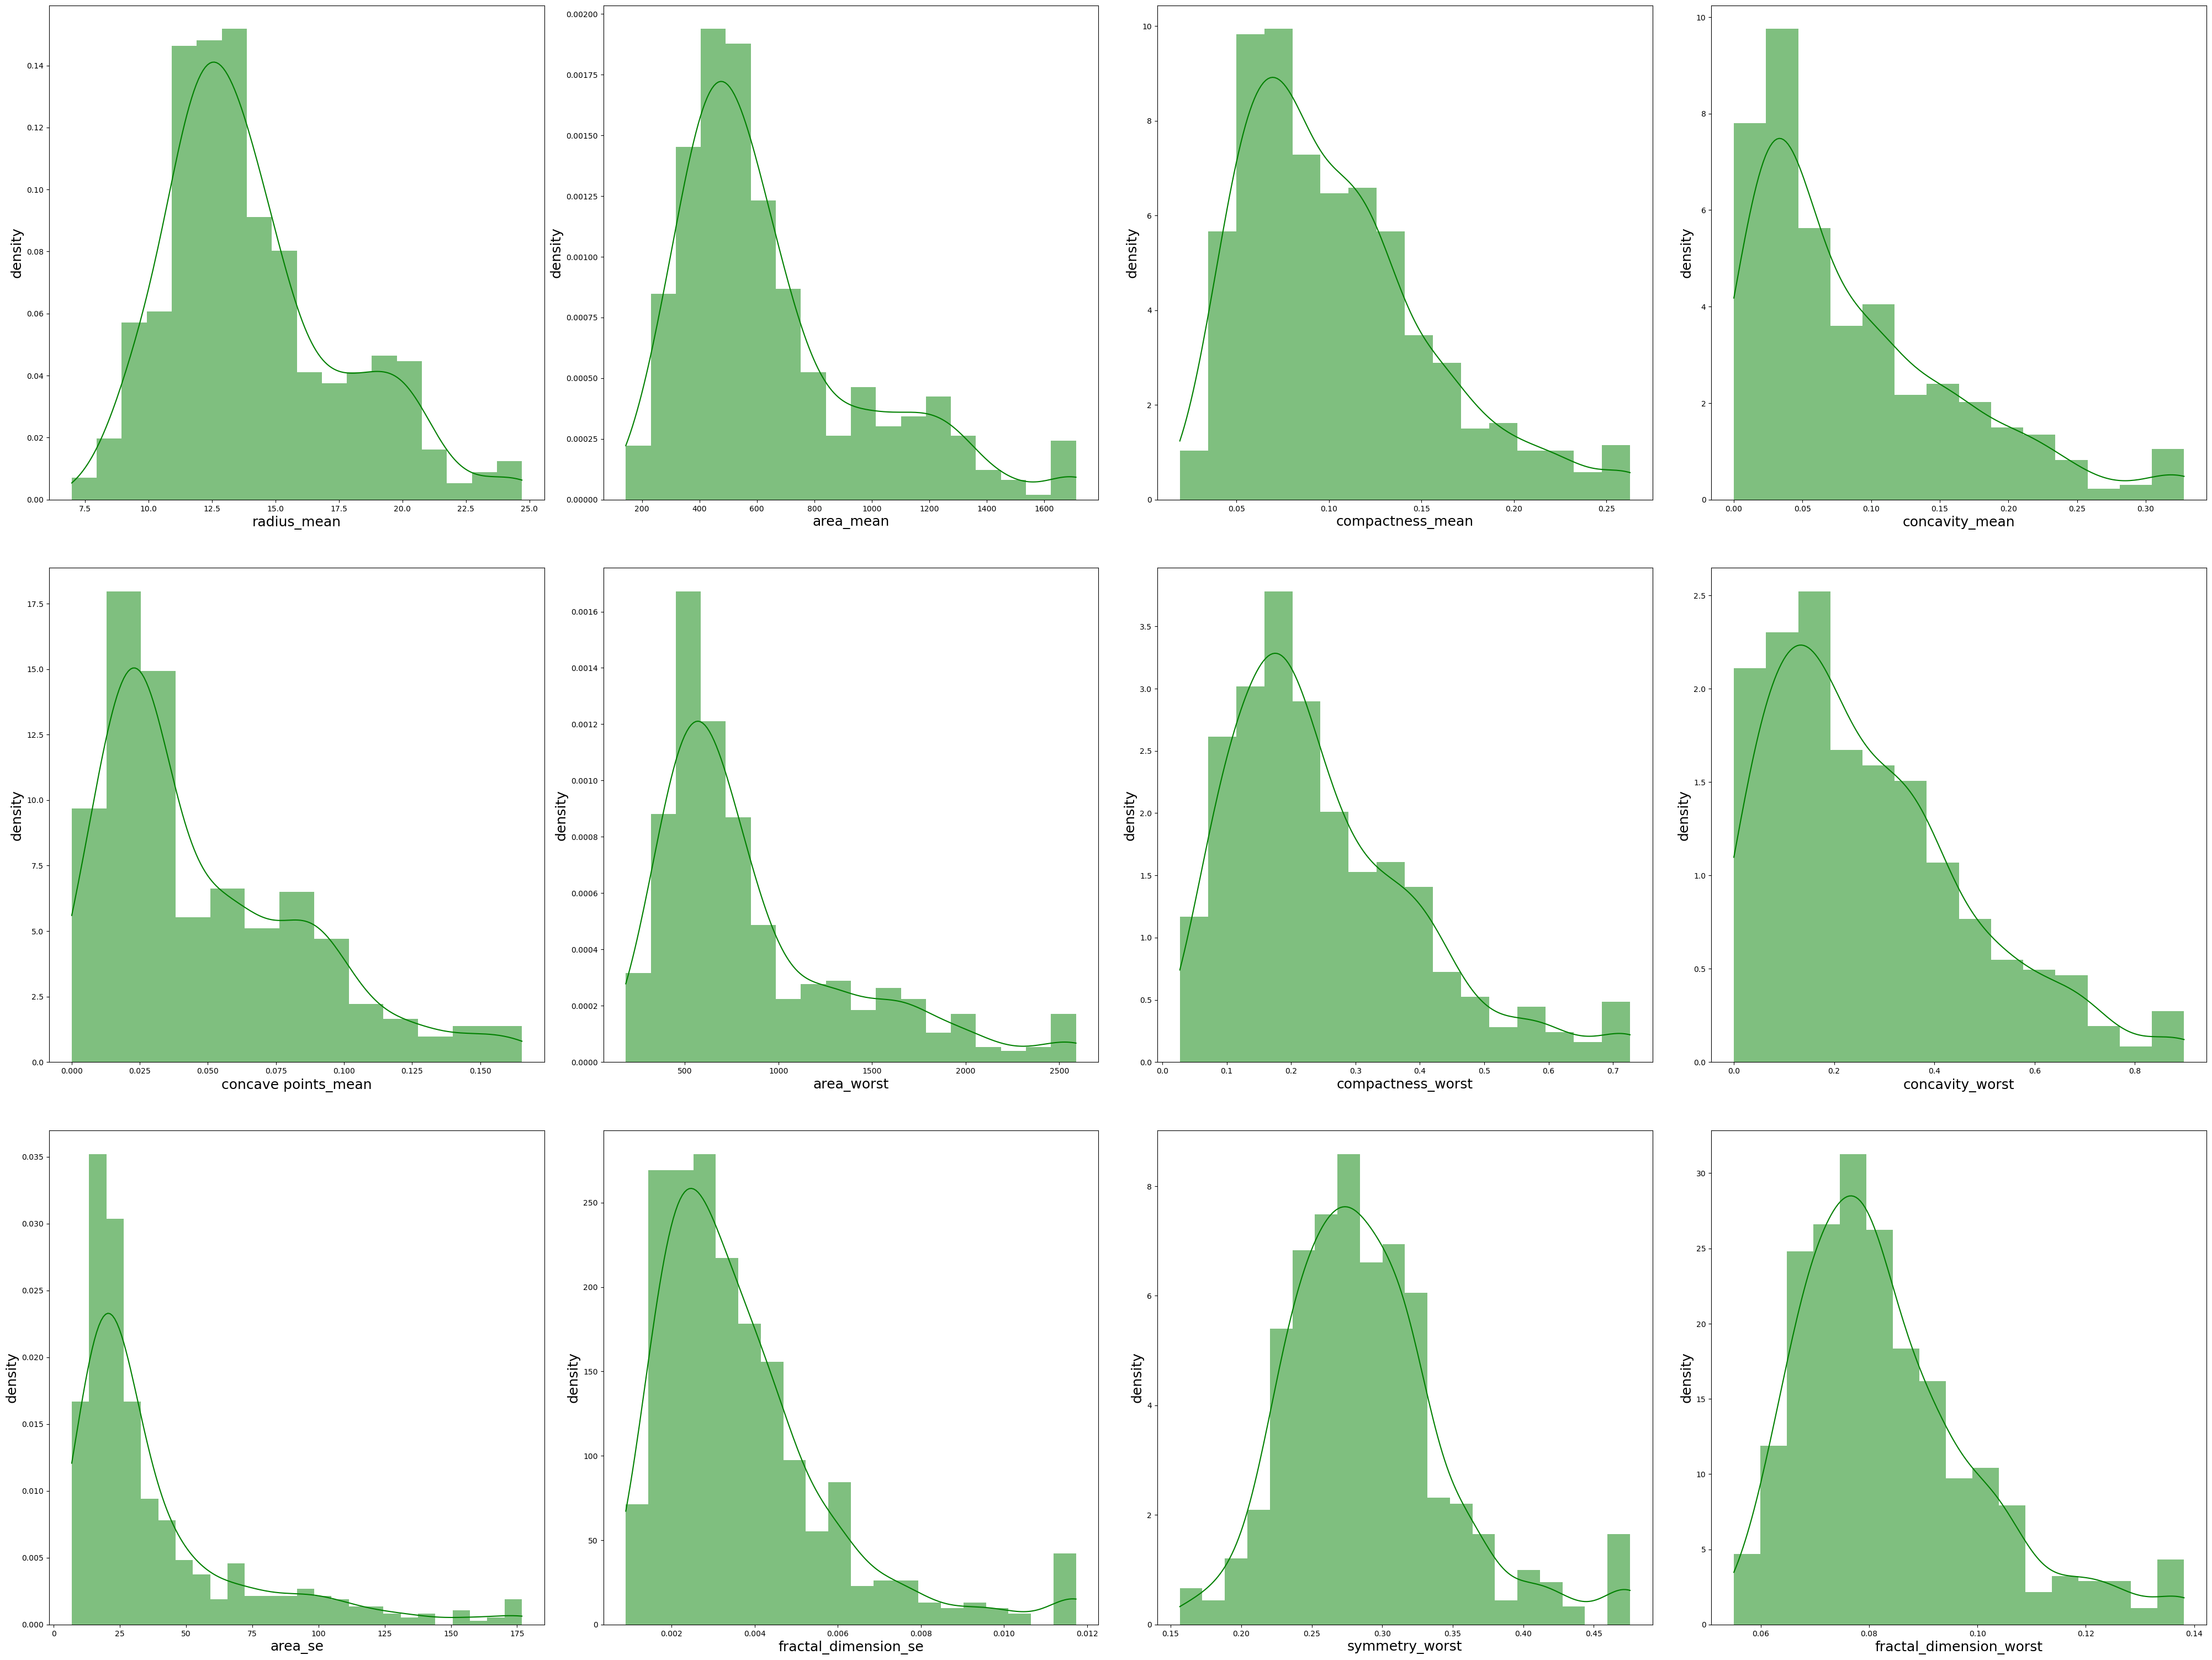

In [59]:
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(40,30))
index = 0
ax = ax.flatten()

for col, value in data_temp.items():
    col_dist = sns.histplot(value, ax=ax[index], color='green',kde=True, stat="density", linewidth=0)
    col_dist.set_xlabel(col,fontsize=18)
    col_dist.set_ylabel('density',fontsize=18)
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [60]:
y = data['diagnosis'].copy()

In [61]:

scaler = StandardScaler()
data_temp = scaler.fit_transform(data_temp)

In [62]:
X_train, X_test, y_train, y_test= train_test_split(data_temp, y, test_size = 0.2, random_state=42)


# Machine Learning Algorithm


## Logistic Regression

In [63]:
log = LogisticRegression()
log.fit(X_train, y_train)
X_test = scaler.fit_transform(X_test)
pred = log.predict(X_test)

In [66]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [65]:
print('Accuracy of Logistic Regression model is {}'.format(accuracy_score(y_test,pred)*100))

Accuracy of Logistic Regression model is 98.24561403508771


## Decision Tree

In [67]:
mdl = DecisionTreeClassifier(criterion="entropy", max_depth=5)
mdl.fit(X_train,y_train)
X_test = scaler.fit_transform(X_test)
y_p = mdl.predict(X_test)

In [68]:
print(classification_report(y_test, y_p))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        71
           1       0.91      0.91      0.91        43

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



In [71]:
cm = confusion_matrix(y_test, pred, labels=mdl.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mdl.classes_)

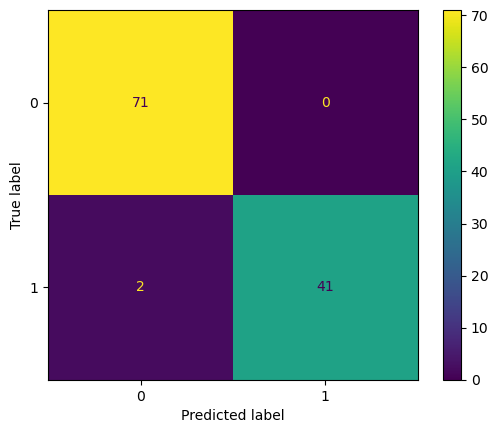

In [72]:
disp.plot()

In [73]:
#printing the accuracy for test set
print('Accuracy of Decision Tree model is {}'.format(accuracy_score(y_test,y_p)*100))

Accuracy of Decision Tree model is 92.98245614035088


In [74]:
import pickle

In [77]:
with open("model.pkl", "wb") as f:
    pickle.dump(log, f)